<a href="https://colab.research.google.com/github/WENKAITAN/CMP414765Spring2022/blob/main/Week12_Homework_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: FashionMNIST

For this homework assignment, you are asked to build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Version: ", tf.__version__)

Version:  2.8.0


In [2]:
# Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes without activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

In [4]:
# Convert the data from integers to floating-point numbers
train_images, test_images = train_images / 255.0, test_images / 255.0

Shape of the image: (28, 28)


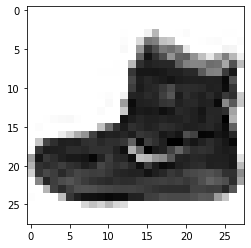

In [9]:
idx = 0
img = train_images[idx, :, :] # : means that we include all indices
print("Shape of the image:", img.shape)
plt.imshow(img, cmap=plt.cm.binary)

In [10]:
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)                                   
])

In [11]:
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
# Set up the training environment
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
# The Model.fit method adjusts the model parameters to minimize the loss
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4808 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3619 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3303 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3062 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2888 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2741 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2626 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2499 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2413 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [15]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3326 - accuracy: 0.8829


[0.332590788602829, 0.8828999996185303]

In [16]:
# Normalize data
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [25]:
test_features_scaled = normalize(test_images)

In [27]:
test_labels = np.array(test_labels)
test_labels.shape

(10000,)

In [29]:
test_predictions = model(test_features_scaled)
test_predictions

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[-12.874358  ,  -3.2973397 , -10.046543  , ...,   2.1329374 ,
        -12.469752  ,   6.285324  ],
       [ -4.345888  , -20.299711  ,   9.106304  , ..., -36.83519   ,
        -12.805811  , -32.347305  ],
       [ -3.7129722 ,  22.019472  ,  -8.956979  , ..., -45.847122  ,
         -8.38054   , -27.43892   ],
       ...,
       [ -2.4429426 , -10.485128  ,  -4.69516   , ..., -13.896547  ,
          5.620138  , -19.116514  ],
       [ -6.067945  ,  14.452473  ,  -6.8280725 , ..., -30.714977  ,
         -3.10895   , -17.205406  ],
       [ -5.081861  ,  -8.599255  ,  -4.621266  , ...,  -2.920509  ,
         -0.62964815,  -7.868111  ]], dtype=float32)>

In [30]:
test_predictions_labels = []
for ind in range(10000):
    pred = np.argmax(tf.nn.softmax(test_predictions[ind]))
    test_predictions_labels.append(pred)
print(test_predictions_labels[:10])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [31]:
confusion_matrix(test_labels, test_predictions_labels)

array([[802,   1,  16,  28,   3,   1, 146,   0,   3,   0],
       [  2, 973,   1,  17,   3,   1,   3,   0,   0,   0],
       [ 11,   0, 800,  11,  72,   0, 105,   0,   1,   0],
       [ 17,   5,  11, 916,  24,   0,  24,   0,   3,   0],
       [  2,   0, 122,  37, 733,   0, 104,   0,   2,   0],
       [  0,   0,   0,   0,   0, 975,   0,  18,   0,   7],
       [100,   0,  60,  33,  41,   0, 762,   0,   4,   0],
       [  0,   0,   0,   0,   0,  14,   0, 970,   0,  16],
       [  5,   1,   4,   6,   2,   3,  15,   4, 960,   0],
       [  0,   0,   0,   0,   0,   8,   1,  53,   0, 938]])

Which type of prediction mistake occurs most frequently?
There are 146 T-shirt/Tops mistaken as Shirts.